In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import ngrams
wordnet = WordNetLemmatizer()
%matplotlib inline

In [2]:
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.lower()
    text = text.split(' ')
    text = [wordnet.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text

def combine_data(list1, list2):
    combined_data = []
    for i in range(len(list1)):
        new_str = list1[i] +' ' + list2[i]
        combined_data.append(new_str)
    return combined_data

def generate_frequency(text_list):
    fdist =  FreqDist()
    for i in text_list:
        words = i.split(' ')
        words = [word for word in words if word != '']
        words = ngrams(words,1)
        for x in words:
            fdist[x[0]]+=1
    return fdist

In [3]:
df = pd.read_csv('../Dataset/RedditSuicideData.csv')

In [4]:
df.head()

,id,subreddit,title,text
0,greo4o,SuicideWatch,“If you truly wanted to kill yourself and wasn...,"Yeah because I DONT WANT TO FUCKING DO IT, but..."
1,c34ko8,SuicideWatch,My girlfriend killed herself a week after we b...,Hello. I don't really know how to start this. ...
2,f9d5go,SuicideWatch,Anyone else not want to die and not want to ki...,NaN
3,e8gjky,SuicideWatch,Raped in front of my girlfriend. feeling like ...,"\n\nI don't know what to say or do, I just fe..."
4,hy8bh6,SuicideWatch,"I wish I could walk into a hospital, throw my ...",But of course they’d lock me up in the mental ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957 entries, 0 to 2956
Data columns (total 4 columns):
id           2957 non-null object
subreddit    2957 non-null object
title        2957 non-null object
text         2564 non-null object
dtypes: object(4)
memory usage: 92.5+ KB


In [6]:
df['text'].fillna(value=' ',inplace=True)

In [7]:
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)

In [8]:
df['cleaned'] = combine_data(df['title'],df['text'])

In [9]:
df.to_csv('./cleanedRedditSuicide.csv', index=False)

In [10]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=100)

In [11]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

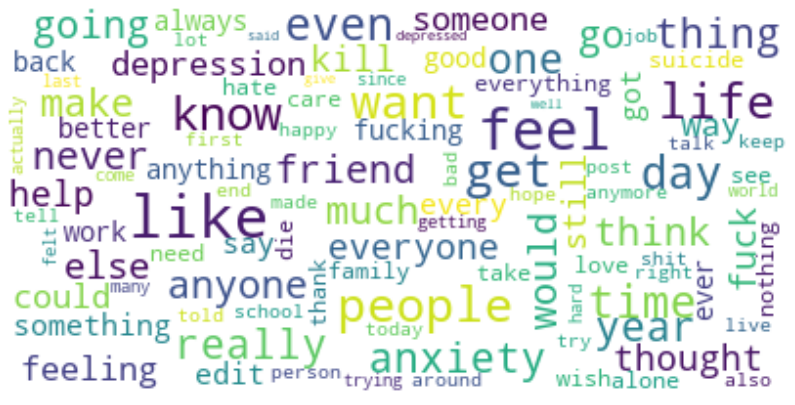

In [12]:
wordcloud = WordCloud(background_color="white",max_font_size=30).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
df = pd.read_csv('../Dataset/TwitterSuicideData.csv')

In [14]:
df.head()

,id,date,text
0,1361102918728884230,2021-02-14 23:59:58+00:00,@CourageBipolar @VoltzRoad @BAIntactivists had...
1,1361102815104557057,2021-02-14 23:59:33+00:00,@pcrafton4 @MrMan45676274 @beardedmilkdud6 @Ci...
2,1361102759966224386,2021-02-14 23:59:20+00:00,@langoo @St3v3ns1 @BFryback Sounds like the mo...
3,1361102721139499016,2021-02-14 23:59:11+00:00,tw // suicide ??\n\nsomeone talk me out of it pls
4,1361102674079457281,2021-02-14 23:59:00+00:00,Death metal looked to have exhaled its last by...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
id      1500 non-null int64
date    1500 non-null object
text    1500 non-null object
dtypes: int64(1), object(2)
memory usage: 35.3+ KB


In [16]:
df['cleaned'] = df['text'].apply(clean_text)

In [17]:
df.to_csv('./cleanedTwitterSuicide.csv', index=False)

In [18]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [19]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

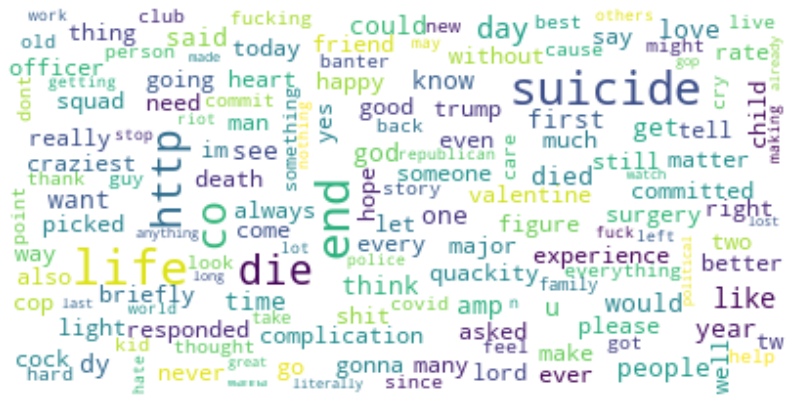

In [20]:
wordcloud = WordCloud(background_color="white",max_font_size=25).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
df = pd.read_csv('../Dataset/NoSuicideData.csv')

In [22]:
df.head()

,id,subreddit,title,text
0,62sjuh,movies,The Senate. Upvote this so that people see it ...,NaN
1,iikebv,movies,‘Black Panther’ actor Chadwick Boseman dies at...,NaN
2,b1i33f,movies,Disney Reinstates Director James Gunn For ‘Gua...,NaN
3,488gjl,movies,Leo gets the Oscar!,NaN
4,jlhi6x,movies,Sir Sean Connery dies aged 90,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 4 columns):
id           2975 non-null object
subreddit    2975 non-null object
title        2975 non-null object
text         434 non-null object
dtypes: object(4)
memory usage: 93.1+ KB


In [24]:
df['text'].fillna(value=' ',inplace=True)

In [25]:
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)

In [26]:
df['cleaned'] = combine_data(df['title'],df['text'])

In [27]:
df.to_csv('./cleanedRedditNonSuicide.csv', index=False)

In [28]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [29]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

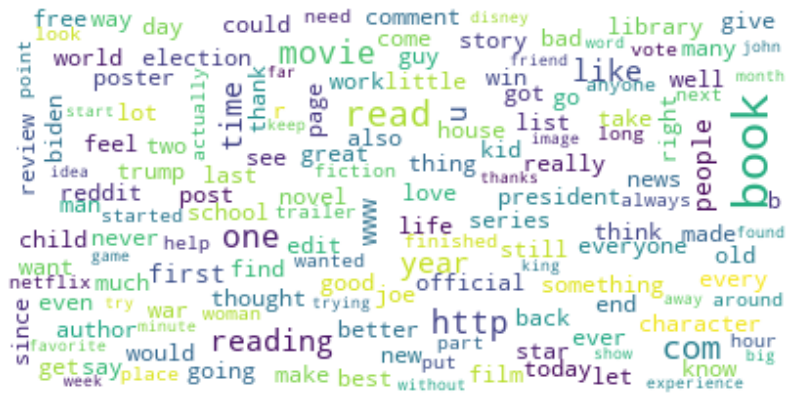

In [30]:
wordcloud = WordCloud(background_color="white",max_font_size=25).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()